# Exercise 3: Finite Size Scaling

In [47]:

import numpy as np
import scipy
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix
import time
from numba import jit
import matplotlib.pyplot as plt

import pickle  # for input/output

# Part a)

In [48]:

def load_data(filename):
    """Load and return data saved to disc with the function `save_data`."""
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data


{16: {'absM': array([[2.22495469e-01, 6.00173496e-04],
       [2.23481875e-01, 1.02221511e-03],
       [2.30168281e-01, 7.73838187e-04],
       [2.37587500e-01, 6.29747477e-04],
       [2.43468437e-01, 1.09185916e-03],
       [2.45462031e-01, 6.09524663e-04],
       [2.57166719e-01, 1.05869076e-03],
       [2.63548750e-01, 1.14750595e-03],
       [2.65414062e-01, 1.49442225e-03],
       [2.77065000e-01, 1.35638286e-03],
       [2.90243281e-01, 1.96435441e-03],
       [2.91380938e-01, 1.57390871e-03],
       [3.01033594e-01, 8.11193669e-04],
       [3.15270469e-01, 1.39663888e-03],
       [3.26448750e-01, 2.15444569e-03],
       [3.31127031e-01, 1.33446262e-03],
       [3.48130156e-01, 8.93159608e-04],
       [3.64208750e-01, 1.70653545e-03],
       [3.69842031e-01, 1.52810435e-03],
       [3.81702188e-01, 1.26890838e-03],
       [4.08486562e-01, 2.35286152e-03],
       [4.20968594e-01, 2.18389062e-03],
       [4.31896562e-01, 1.72278641e-03],
       [4.54135156e-01, 2.23451523e-03],
  

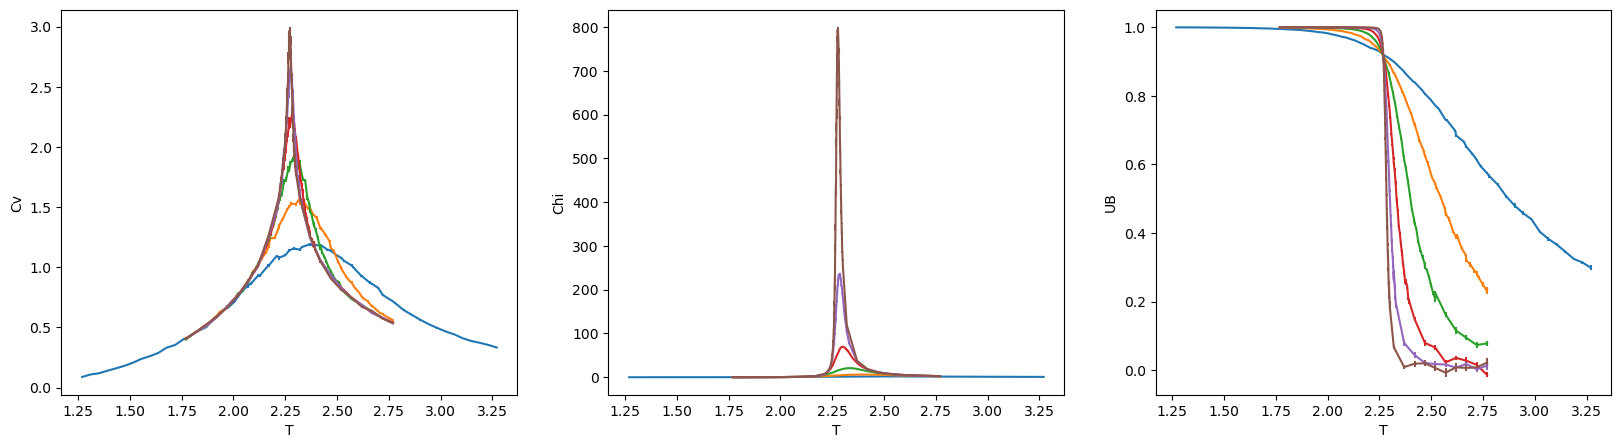

In [73]:
data2 = load_data("/Users/Giovanni/Desktop/CompQMBP/tutorials-2024/1_classical_montecarlo/data_square/data_ising_square_largeL.pkl")
print(data2)

Ls = data2['Ls']

Cv=[]
chi = []
Ts = []
UB = []

fig, axes = plt.subplots(1,3,figsize=(20,5))
ax_Cv, ax_chi, ax_UB = axes

ax_Cv.set_xlabel("T")
ax_Cv.set_ylabel("Cv")
ax_chi.set_xlabel("T")
ax_chi.set_ylabel("Chi")
ax_UB.set_xlabel("T")
ax_UB.set_ylabel("UB")

for i, L in enumerate(Ls):
    Cv.append(data2[L]['C'])
    chi.append(data2[L]['chi'])
    Ts.append(data2[L]['Ts'])
    UB.append(data2[L]['UB'])
    ax_Cv.errorbar(Ts[i], Cv[i][:,0], Cv[i][:,1])
    ax_chi.errorbar(Ts[i], chi[i][:,0], chi[i][:,1])
    ax_UB.errorbar(Ts[i],UB[i][:,0],UB[i][:,1])


## Part b, c


In [50]:
def find_Tc(X,Ts):
    max_value_index = np.argmax(X)
    return Ts[max_value_index]

In [61]:
Tc_Cv = []
Tc_chi = []
for i in range(len(Ls)):
    Tc_Cv.append(find_Tc(Cv[i][:,0],Ts[i]))
    Tc_chi.append(find_Tc(chi[i][:,0],Ts[i]))

Ls = np.array(Ls)
InverseL = 1/Ls


print(Ls)
print(InverseL)
print(len(Ls))


[  8  16  32  64 128 256]
[0.125      0.0625     0.03125    0.015625   0.0078125  0.00390625]
6


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19]


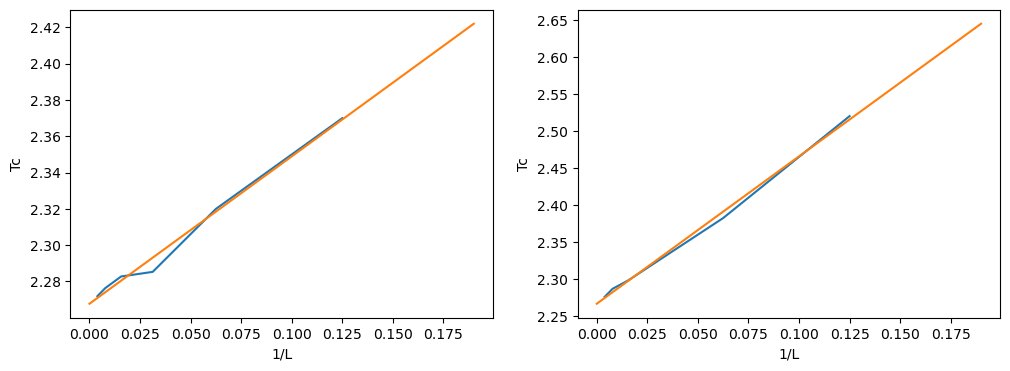

In [68]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
ax1, ax2 = axes

ax1.set_xlabel("1/L")
ax1.set_ylabel("Tc")
ax2.set_xlabel("1/L")
ax2.set_ylabel("Tc")

ax1.plot(InverseL,Tc_Cv)
ax2.plot(InverseL,Tc_chi)

a1, b1 = np.polyfit(InverseL,Tc_Cv,1) #y = ax + b
a2,b2 = np.polyfit(InverseL,Tc_chi,1)

def lin_func(a,b,x):
    return a*x+b

x = np.arange(0,0.2,0.01)
vec_Y = np.vectorize(lin_func)
y1 = vec_Y(a1,b1,x)
y2 = vec_Y(a2,b2,x)
ax1.plot(x,y1)
ax2.plot(x,y2)
print(x)

In [71]:
Tc = (y1[0]+y2[0])/2 #or more easily the two intercette b
print("Tc = ",Tc)

Tc =  2.267087267742918


# Part c)